In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [10]:
data = pd.read_csv("C:\\Users\\Home\\Documents\\R_code\\Coursera\\Machine Learning\\machine-learning-ex1\\ex1\\ex1data1.txt"
                  ,header = None
                  ,names = ['population', 'profit'])

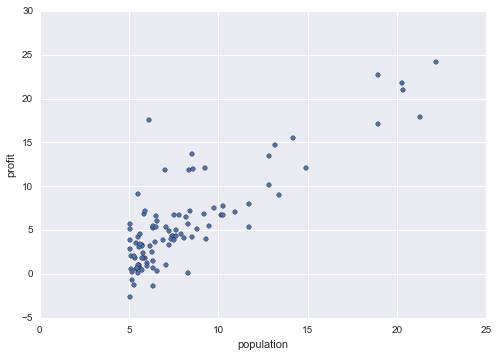

In [8]:
import seaborn as sns

data.plot(x='population', y = 'profit', kind = 'scatter')

In [11]:
# gradient descent
data.insert(0, 'ones',1.)

In [12]:
theta = np.zeros(2)

In [13]:
# settings
iterations = 1500
alpha = 0.01

In [15]:
X = data[['ones','population']].values
y = data['profit'].values
m = len(data)

In [29]:
#http://openclassroom.stanford.edu/MainFolder/DocumentPage.php?course=MachineLearning&doc=exercises/ex3/ex3.html

array([ 0.])

In [77]:
def compute_cost(X, y, theta):
    # COMPUTECOST Compute cost for linear regression
    # J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
    # parameter for linear regression to fit the data points in X and y
    
    # some useful values
    m = len(X)
    
    # You need to return this value correctly:
    J = 0
    
    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the cost of a particular choice of theta
    #               You should set J to the cost.
     
    J = 1/(2*m) * (X* theta - y[:]).T * (X*theta - y)
    
    # ============================================================
    return J.sum()

In [80]:
for i in range(0,1) :
    print compute_cost(X[:,1], y, theta[i])

0.0


In [ ]:
def gradient_descent(X, y, theta, alpha, num_iters):
    # GRADIENTDESCENT Performs gradient descent to learn theta
    # theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
    # taking num_iters gradient steps with learning rate alpha
    
    # Initialize
    J_history = np.zeros((num_iters,))
    T_history = np.zeros((num_iters,2))
    
    for i in range(num_iters):
        T_history[i] = theta

        ### ========= YOUR CODE HERE ============
        # Instructions: Perform a single gradient step on the parameter vector theta.
        
        predictions  = X * theta
        updates = np.linalg.inv(X) *  (predictions - y)
        theta = theta - alpha * (1/m) * updates
        
        ### =====================================
        
        J_history[i] = compute_cost(X, y, theta)
    return theta, J_history, T_history

In [16]:
'''Standard python modules'''
import sys

'''For scientific computing'''
from numpy import *
import scipy

'''For plotting'''
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D

EX_DIRECTORY_PATH = 'C:\\Users\\Home\\Documents\\R_code\\Coursera\\Machine Learning\\machine-learning-ex1\\ex1\\'

def part1():
    A = eye(5)
    print A


def hypothesis(X, theta):
    """Hypothesis function for linear regression
    this should be inlined code, but it's here for clear representation purpsoes
    """
    return X.dot(theta)


def computeCostLoop(X, y, theta):
    """Compute cost but in the slower loop method, in order to show how the
    pre-vectorization algorithm initially works. Always start with loop version first
    and code the vectorized version later
    """
    m = len(y)  # or m = shape(y)[0], since y is 1D

    cumulative_sum = 0
    for i in range(0, m):
        cumulative_sum += (hypothesis(X[i], theta) - y[i]) ** 2
    cumulative_sum = (1.0 / (2 * m)) * cumulative_sum
    return cumulative_sum


def computeCost(X, y, theta):
    """Compute cost, vectorized version"""
    m 	 = len(y)
    term = hypothesis(X, theta) - y
    # sum( term**2 ) in this case ~= term.T.dot( term )
    return (term.T.dot(term) / (2 * m))[0, 0]


In [17]:
def gradientDescentLoop(X, y, theta, alpha, iterations):
    """ Gradient descent loop version"""
    grad = copy(theta)
    m = len(y)
    n = shape(X)[1]
    
    for counter in range(0, iterations):
        # create n number of cumulative inner sums
        cum_sum = [0 for x in range(0,1)]
        
        for j in range(0,m):
            for i in range(0,m):
                term = (hypothesis(X[i], grad) - y[i])
                cum_sum[j] += X[i,j] * (term)
                
    # assigne new values foreach gradient 
        for j in range(0,n):
            grad[j] = grad[j] - cum_sum[j] * (alpha / m)
            
    return grad

In [18]:
def gradientDescent(X, y, theta, alpha, iterations):
    """ Vectorized gradient descent"""
    grad = copy(theta)
    m = len(y)
    
    for counter in range(0, iterations):
        inner_sum = X.T.dot(hypothesis(X, grad)- y)
        grad -= alpha / m * inner_sum
        
    return grad

In [19]:
def plot(X, y):
    """Create a plot out of X and y data, X should exclude the intercept units.
    Call pyplot.show(block=True) in order to show the plot window"""
    pyplot.plot(X, y, 'rx', markersize=5 )
    pyplot.ylabel('Profit in $10,000s')
    pyplot.xlabel('Population of City in 10,000s')

In [23]:
%matplotlib inline

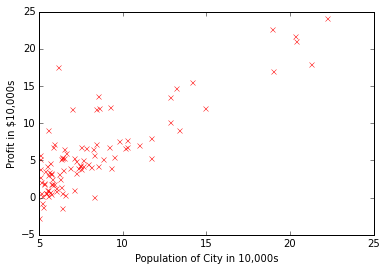

In [25]:
data = genfromtxt( EX_DIRECTORY_PATH + "ex1data1.txt", delimiter=',')
X, y = data[:, 0], data[:, 1]
m 	 = len(y)
y 	 = y.reshape(m, 1)
plot(X, y)

In [26]:
X = c_[ones((m,1)), X]
theta = zeros((2,1))
iterations = 1500
alpha = 0.01

cost = computeCost(X,y,theta)
theta = gradientDescent(X,y,theta, alpha, iterations)
print cost
print theta

32.0727338775
[[-3.63029144]
 [ 1.16636235]]


In [27]:
predict1 = array([1,3.5]).dot(theta)
predict2 = array([1,7]).dot(theta)
print predict1
print predict2

[ 0.45197679]
[ 4.53424501]


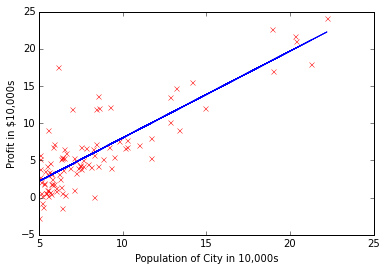

In [29]:
plot(X[:,1], y)
pyplot.plot(X[:,1], X.dot(theta), "b-")

In [30]:
# part 2.4
data = genfromtxt(EX_DIRECTORY_PATH + "/ex1data1.txt", delimiter=",")
X,y = data[:,0], data[:,1]
m = len(y)
y = y.reshape(m,1)
X = c_[ones((m,1)), X]

In [31]:
theta0_vals = linspace(-10,10,100)
theta1_vals = linspace(-4,4,100)

In [ ]:
J_vals = zeros((len(theta0_vals), len(theta1_vals)), dtype = float64)
for i, v0 in enumerate(theta0_vals):
    for j, v1 in enumerate(theta1_vals):
        theta = array((theta0_vals[i], theta1_vals[j])).reshape(2,1)
        J_vals[i,j] = computeCost(X,y,theta)
        
        R, P = meshgrid(theta0_vals, theta1_vals)
        
        fig = pyplot.figure()
        ax = fig.gca(projection = '3d')
        ax.plot_surface(R,P, J_vals)
        
        fig = pyplot.figure()
        pyplot.contourf(R, P, J_vals.T, logspace(-2, 3, 20))
        pyplot.plot(theta[0], theta[1], 'rx', markersize = 10)